In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [103]:


#Load data
from pathlib import Path
comp_dir = Path('../input/store-sales-time-series-forecasting')


store_sales = pd.read_csv(
    comp_dir / 'train.csv',
    usecols=['store_nbr', 'family', 'date', 'sales','onpromotion'],
    dtype={
        'store_nbr': 'category',
        'family': 'category',
        'sales': 'float32',
        'onpromotion': 'uint32',
    },
    parse_dates=['date'],
    infer_datetime_format=True,
)





In [104]:
store_sales.sample(20)

,date,store_nbr,family,sales,onpromotion
1248698,2014-12-03,45,FROZEN FOODS,480.110992,2
2966795,2017-07-27,51,PREPARED FOODS,108.889000,0
2965338,2017-07-27,11,MEATS,858.180969,21
2667704,2017-02-10,10,HOME APPLIANCES,0.000000,0
35091,2013-01-20,43,GROCERY I,1708.000000,0
1101206,2014-09-11,7,PREPARED FOODS,182.733002,0
1454364,2015-03-30,16,LINGERIE,3.000000,0
1496621,2015-04-22,51,BREAD/BAKERY,890.057007,1
2364159,2016-08-22,43,CELEBRATION,9.000000,0
1351257,2015-01-31,23,CELEBRATION,0.000000,0


In [105]:
store_sales.head(5)

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [106]:
store_sales['date'] = store_sales.date.dt.to_period('D')
store_sales

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000000,0
1,2013-01-01,1,BABY CARE,0.000000,0
2,2013-01-01,1,BEAUTY,0.000000,0
3,2013-01-01,1,BEVERAGES,0.000000,0
4,2013-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.132996,0
3000884,2017-08-15,9,PREPARED FOODS,154.552994,1
3000885,2017-08-15,9,PRODUCE,2419.729004,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,8


In [107]:
store_sales = store_sales.set_index(['store_nbr', 'family', 'date']).sort_index()
store_sales

sales  onpromotion
store_nbr family     date                              
1         AUTOMOTIVE 2013-01-01   0.000000            0
                     2013-01-02   2.000000            0
                     2013-01-03   3.000000            0
                     2013-01-04   3.000000            0
                     2013-01-05   5.000000            0
...                                    ...          ...
9         SEAFOOD    2017-08-11  23.830999            0
                     2017-08-12  16.859001            4
                     2017-08-13  20.000000            0
                     2017-08-14  17.000000            0
                     2017-08-15  16.000000            0

[3000888 rows x 2 columns]

<AxesSubplot:xlabel='date'>

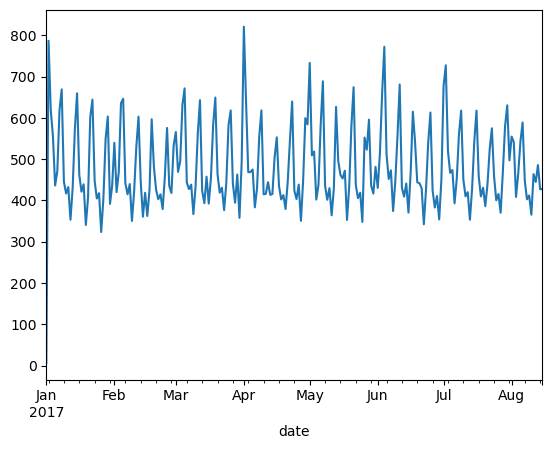

In [108]:
average_sales = (
    store_sales
    .groupby('date').mean()
    .squeeze()
    .loc["2017"]
    
)
average_sales["sales"].plot()

In [109]:
#define target
y = store_sales.unstack(['store_nbr', 'family']).loc["2017"]

# Create training data
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
fourier = CalendarFourier(freq='M', order=4)
dp = DeterministicProcess(
    index=y.index,
    constant=True,
    order=1,
    seasonal=True,
    additional_terms=[fourier],
    drop=True,
)
X = dp.in_sample()
X['NewYear'] = (X.index.dayofyear == 1)

In [110]:
X

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=M)","cos(1,freq=M)","sin(2,freq=M)","cos(2,freq=M)","sin(3,freq=M)","cos(3,freq=M)","sin(4,freq=M)","cos(4,freq=M)",NewYear
date,,,,,,,,,,,,,,,,,
2017-01-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,True
2017-01-02,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.201299,0.979530,0.394356,0.918958,0.571268,0.820763,0.724793,0.688967,False
2017-01-03,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.394356,0.918958,0.724793,0.688967,0.937752,0.347305,0.998717,-0.050649,False
2017-01-04,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.571268,0.820763,0.937752,0.347305,0.968077,-0.250653,0.651372,-0.758758,False
2017-01-05,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.724793,0.688967,0.998717,-0.050649,0.651372,-0.758758,-0.101168,-0.994869,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,1.0,223.0,0.0,0.0,0.0,0.0,1.0,0.0,0.897805,-0.440394,-0.790776,-0.612106,-0.201299,0.979530,0.968077,-0.250653,False
2017-08-12,1.0,224.0,0.0,0.0,0.0,0.0,0.0,1.0,0.790776,-0.612106,-0.968077,-0.250653,0.394356,0.918958,0.485302,-0.874347,False
2017-08-13,1.0,225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.651372,-0.758758,-0.988468,0.151428,0.848644,0.528964,-0.299363,-0.954139,False


In [111]:
tseries = store_sales.groupby(['date'])['sales'].agg(
    ['sum']).reset_index().rename(columns={'sum': 'Sales'})
tseries = tseries.set_index('date')
tseries

,Sales
date,
2013-01-01,2511.618896
2013-01-02,496092.406250
2013-01-03,361461.218750
2013-01-04,354459.687500
2013-01-05,477350.125000
...,...
2017-08-11,826373.750000
2017-08-12,792630.562500
2017-08-13,865639.687500


**STart****start******

In [112]:
train_df = pd.read_csv('../input/store-sales-time-series-forecasting/train.csv', parse_dates=['date'])
test_df = pd.read_csv('../input/store-sales-time-series-forecasting/test.csv', parse_dates=['date'])

In [113]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(train_df['family'])
label2 = le.fit_transform(train_df['store_nbr'])
# printing label
label,label2


(array([ 0,  1,  2, ..., 30, 31, 32]), array([0, 0, 0, ..., 8, 8, 8]))

In [114]:
train_df.drop(("family"), axis=1, inplace=True)
train_df.drop(("store_nbr"), axis=1, inplace=True)
 
# Appending the array to dataFrame

train_df["family"] = label
train_df["store_nbr"] = label2

train_df = train_df[(train_df['date'] >= '2017-01-01')] #working on data starting from this date


In [115]:
#Rearrange data
train_gp = train_df.sort_values('date').groupby(['family', 'store_nbr', 'date','onpromotion'], as_index=False)
train_gp = train_gp.agg({'sales':['mean']})
train_gp.columns = ['family', 'store_nbr', 'date', 'onpromotion','sales']
train_gp


,family,store_nbr,date,onpromotion,sales
0,0,0,2017-01-01,0,0.0
1,0,0,2017-01-02,0,5.0
2,0,0,2017-01-03,0,4.0
3,0,0,2017-01-04,0,1.0
4,0,0,2017-01-05,0,2.0
...,...,...,...,...,...
404509,32,53,2017-08-11,0,0.0
404510,32,53,2017-08-12,1,1.0
404511,32,53,2017-08-13,0,2.0
404512,32,53,2017-08-14,0,0.0


In [116]:
# Transform series to supervised learning 

def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg



In [117]:
lagsize=16
window = 29
lag = lagsize
series = series_to_supervised(train_gp.drop('date', axis=1), window=window, lag=lag)
series

,family(t-29),store_nbr(t-29),onpromotion(t-29),sales(t-29),family(t-28),store_nbr(t-28),onpromotion(t-28),sales(t-28),family(t-27),store_nbr(t-27),...,onpromotion(t-1),sales(t-1),family(t),store_nbr(t),onpromotion(t),sales(t),family(t+16),store_nbr(t+16),onpromotion(t+16),sales(t+16)
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0,0,0,3.0,0.0,0.0,0.0,3.0
30,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,3.0,0,0,0,5.0,0.0,0.0,0.0,3.0
31,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,5.0,0,0,0,7.0,0.0,0.0,0.0,7.0
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,7.0,0,0,0,3.0,0.0,0.0,0.0,3.0
33,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,3.0,0,0,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404493,32.0,53.0,0.0,11.0,32.0,53.0,0.0,1.0,32.0,53.0,...,0.0,7.0,32,53,1,3.0,32.0,53.0,0.0,0.0
404494,32.0,53.0,0.0,1.0,32.0,53.0,0.0,1.0,32.0,53.0,...,1.0,3.0,32,53,0,2.0,32.0,53.0,1.0,1.0
404495,32.0,53.0,0.0,1.0,32.0,53.0,0.0,0.0,32.0,53.0,...,0.0,2.0,32,53,0,4.0,32.0,53.0,0.0,2.0
404496,32.0,53.0,0.0,0.0,32.0,53.0,1.0,2.0,32.0,53.0,...,0.0,4.0,32,53,2,4.0,32.0,53.0,0.0,0.0


<AxesSubplot:>

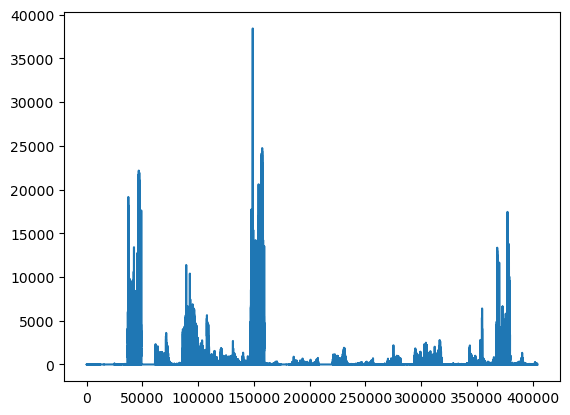

In [118]:
series.iloc[:,3].plot()


In [119]:
#Drop rows with different item or store values than the shifted columns

last_item = 'family(t-%d)' % window
last_store = 'store_nbr(t-%d)' % window
last_onpromotion = 'onpromotion(t-%d)' % window
series = series[(series['store_nbr(t)'] == series[last_store])]
series = series[(series['family(t)'] == series[last_item])]
series = series[(series['onpromotion(t)'] == series[last_item])]
series

,family(t-29),store_nbr(t-29),onpromotion(t-29),sales(t-29),family(t-28),store_nbr(t-28),onpromotion(t-28),sales(t-28),family(t-27),store_nbr(t-27),...,onpromotion(t-1),sales(t-1),family(t),store_nbr(t),onpromotion(t),sales(t),family(t+16),store_nbr(t+16),onpromotion(t+16),sales(t+16)
29,0.0,0.0,0.0,0.000,0.0,0.0,0.0,5.000,0.0,0.0,...,0.0,0.000000,0,0,0,3.00000,0.0,0.0,0.0,3.00000
30,0.0,0.0,0.0,5.000,0.0,0.0,0.0,4.000,0.0,0.0,...,0.0,3.000000,0,0,0,5.00000,0.0,0.0,0.0,3.00000
31,0.0,0.0,0.0,4.000,0.0,0.0,0.0,1.000,0.0,0.0,...,0.0,5.000000,0,0,0,7.00000,0.0,0.0,0.0,7.00000
32,0.0,0.0,0.0,1.000,0.0,0.0,0.0,2.000,0.0,0.0,...,0.0,7.000000,0,0,0,3.00000,0.0,0.0,0.0,3.00000
33,0.0,0.0,0.0,2.000,0.0,0.0,0.0,2.000,0.0,0.0,...,0.0,3.000000,0,0,0,1.00000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355089,28.0,52.0,0.0,160.874,28.0,52.0,31.0,230.082,28.0,52.0,...,0.0,189.204000,28,52,28,252.09001,28.0,52.0,0.0,238.16100
355110,28.0,52.0,0.0,166.604,28.0,52.0,30.0,326.836,28.0,52.0,...,0.0,98.655000,28,52,28,224.98100,28.0,52.0,0.0,246.04300
355131,28.0,52.0,0.0,128.629,28.0,52.0,30.0,200.806,28.0,52.0,...,0.0,112.118004,28,52,28,205.70100,28.0,52.0,0.0,249.45801
355201,28.0,52.0,0.0,149.188,28.0,52.0,34.0,333.116,28.0,52.0,...,1.0,139.706000,28,52,28,191.33800,28.0,52.0,0.0,351.27500


In [120]:
#Remove unwanted columns
columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['family', 'store_nbr','onpromotion']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['family', 'store_nbr','onpromotion']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop(['family(t)', 'store_nbr(t)'], axis=1, inplace=True)


In [121]:
series

,sales(t-29),sales(t-28),sales(t-27),sales(t-26),sales(t-25),sales(t-24),sales(t-23),sales(t-22),sales(t-21),sales(t-20),...,sales(t-7),sales(t-6),sales(t-5),sales(t-4),sales(t-3),sales(t-2),sales(t-1),onpromotion(t),sales(t),sales(t+16)
29,0.000,5.000,4.000,1.000,2.000,2.000,5.000,0.00000,2.00000,3.000,...,4.000,7.000,6.00000,12.000,2.00000,6.000,0.000000,0,3.00000,3.00000
30,5.000,4.000,1.000,2.000,2.000,5.000,0.000,2.00000,3.00000,10.000,...,7.000,6.000,12.00000,2.000,6.00000,0.000,3.000000,0,5.00000,3.00000
31,4.000,1.000,2.000,2.000,5.000,0.000,2.000,3.00000,10.00000,2.000,...,6.000,12.000,2.00000,6.000,0.00000,3.000,5.000000,0,7.00000,7.00000
32,1.000,2.000,2.000,5.000,0.000,2.000,3.000,10.00000,2.00000,3.000,...,12.000,2.000,6.00000,0.000,3.00000,5.000,7.000000,0,3.00000,3.00000
33,2.000,2.000,5.000,0.000,2.000,3.000,10.000,2.00000,3.00000,2.000,...,2.000,6.000,0.00000,3.000,5.00000,7.000,3.000000,0,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355089,160.874,230.082,211.516,265.897,169.920,137.668,196.430,119.58500,192.71400,241.292,...,326.836,300.861,242.95400,157.928,152.33700,195.747,189.204000,28,252.09001,238.16100
355110,166.604,326.836,300.861,242.954,157.928,152.337,195.747,189.20400,252.09001,248.535,...,200.806,222.756,238.16100,183.291,144.17800,158.869,98.655000,28,224.98100,246.04300
355131,128.629,200.806,222.756,238.161,183.291,144.178,158.869,98.65500,224.98100,268.460,...,241.572,189.621,246.04300,140.665,146.48500,162.311,112.118004,28,205.70100,249.45801
355201,149.188,333.116,274.325,273.288,150.801,135.117,253.544,144.65400,320.28800,305.302,...,313.641,342.932,282.56702,180.396,133.36101,183.869,139.706000,28,191.33800,351.27500


In [122]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()

# s=scaler.fit_transform(series)

# series=pd.DataFrame(s,columns=series.columns)
# series

In [123]:
lag_size=16
# Label
labels_col = 'sales(t+%d)' % lag_size
labels = series[labels_col]
series = series.drop(labels_col, axis=1)

In [124]:


from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(series, labels.values, test_size=0.2, random_state=0)
print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)
X_train

Train set shape (10364, 31)
Validation set shape (2592, 31)


,sales(t-29),sales(t-28),sales(t-27),sales(t-26),sales(t-25),sales(t-24),sales(t-23),sales(t-22),sales(t-21),sales(t-20),...,sales(t-8),sales(t-7),sales(t-6),sales(t-5),sales(t-4),sales(t-3),sales(t-2),sales(t-1),onpromotion(t),sales(t)
4500,7.000,3.000,12.000,15.000,3.000,7.000,9.000,8.000,2.000,5.000,...,6.000,9.000,21.000,20.00,11.000,4.000,13.00,6.000,0,3.000
9652,4.000,5.000,3.000,2.000,3.000,3.000,2.000,3.000,9.000,9.000,...,4.000,1.000,2.000,6.00,1.000,0.000,2.00,1.000,0,0.000
10976,10.000,11.000,8.000,19.000,18.000,11.000,26.000,30.000,15.000,11.000,...,5.000,15.000,16.000,14.00,13.000,20.000,9.00,10.000,0,5.000
5895,7.000,3.000,1.000,3.000,4.000,9.000,0.000,1.000,6.000,5.000,...,5.000,7.000,1.000,4.00,16.000,8.000,1.00,2.000,0,3.000
73389,198.000,187.000,243.000,421.000,237.000,140.000,186.000,144.000,134.000,262.000,...,187.000,229.000,222.000,307.00,176.000,196.000,134.00,174.000,5,149.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,13.000,7.000,9.000,11.000,9.000,12.000,7.000,7.000,3.000,8.000,...,7.000,9.000,7.000,10.00,10.000,7.000,5.00,7.000,0,2.000
4011,7.000,1.000,7.000,6.000,1.000,7.000,2.000,4.000,2.000,2.000,...,0.000,0.000,10.000,4.00,1.000,3.000,2.00,3.000,0,2.000
27656,1.000,3.000,0.000,5.000,5.000,4.000,0.000,3.000,1.000,0.000,...,6.000,5.000,9.000,5.00,5.000,1.000,1.00,6.000,2,3.000
62984,1214.795,1239.396,991.753,811.932,932.002,687.463,989.278,1261.866,1233.758,801.925,...,1086.767,1245.496,777.923,787.63,953.445,1014.665,762.91,1011.004,5,944.744


In [125]:
Y_train

array([ 12.   ,   6.   ,   8.   , ...,   1.   , 855.037,   1.   ])

In [126]:
import warnings
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go

from keras.layers import Dropout

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

%matplotlib inline
warnings.filterwarnings("ignore")


In [127]:
# Set parameters
epochs = 1000
batch = 128
lr = 0.00001
adam = optimizers.Adam(lr)

X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (10364, 31, 1)
Validation set shape (2592, 31, 1)


In [128]:
input_shape=(X_train_series.shape[1], X_train_series.shape[2])
input_shape

(31, 1)

In [129]:
cnn = Sequential()
cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense (128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense (128, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense (34, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(1))
cnn.compile(loss='mse', optimizer=adam)
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 30, 128)           384       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 15, 128)          0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1920)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               245888    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                      

In [130]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
cnn_history = cnn.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid), callbacks=[callback],epochs=epochs, verbose=2)


Epoch 1/1000
324/324 - 3s - loss: 53013.5625 - val_loss: 23219.3047 - 3s/epoch - 8ms/step
Epoch 2/1000
324/324 - 2s - loss: 19548.9688 - val_loss: 8429.9600 - 2s/epoch - 6ms/step
Epoch 3/1000
324/324 - 2s - loss: 14868.9248 - val_loss: 7271.5615 - 2s/epoch - 6ms/step
Epoch 4/1000
324/324 - 2s - loss: 14810.4609 - val_loss: 6899.5410 - 2s/epoch - 6ms/step
Epoch 5/1000
324/324 - 2s - loss: 15130.8809 - val_loss: 6726.9019 - 2s/epoch - 6ms/step
Epoch 6/1000
324/324 - 2s - loss: 13144.9111 - val_loss: 6543.6660 - 2s/epoch - 6ms/step
Epoch 7/1000
324/324 - 2s - loss: 13821.7012 - val_loss: 6672.2915 - 2s/epoch - 7ms/step
Epoch 8/1000
324/324 - 2s - loss: 14058.2158 - val_loss: 6634.2622 - 2s/epoch - 6ms/step
Epoch 9/1000
324/324 - 2s - loss: 12404.8662 - val_loss: 6309.7261 - 2s/epoch - 6ms/step
Epoch 10/1000
324/324 - 2s - loss: 12198.7090 - val_loss: 6186.9062 - 2s/epoch - 6ms/step
Epoch 11/1000
324/324 - 2s - loss: 13696.9492 - val_loss: 6131.6860 - 2s/epoch - 6ms/step
Epoch 12/1000
324/

In [131]:
epochs = 1000
batch = 128
lr = 0.00001
adam = optimizers.Adam(lr)


lstm = Sequential()
lstm.add(LSTM(256, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
lstm.add(Dense(128))
lstm.add(Dropout(0.2))
lstm.add(Dense(64))
lstm.add(Dense(32))
lstm.add(Dense(1))
lstm.compile(loss='mse', optimizer=adam)
lstm.summary()
Model: "sequential_1"

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 256)               264192    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 307,457
Trainable params: 307,457
Non-tr

In [132]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

lstm_history = lstm.fit(X_train_series, Y_train, validation_data=(X_valid_series, Y_valid),callbacks=[callback], epochs=epochs, verbose=2)

Epoch 1/1000
324/324 - 24s - loss: 216416.0312 - val_loss: 153593.2031 - 24s/epoch - 74ms/step
Epoch 2/1000
324/324 - 23s - loss: 108201.2500 - val_loss: 56252.1094 - 23s/epoch - 70ms/step
Epoch 3/1000
324/324 - 23s - loss: 54641.0430 - val_loss: 40846.0078 - 23s/epoch - 71ms/step
Epoch 4/1000
324/324 - 24s - loss: 39244.1602 - val_loss: 39320.7148 - 24s/epoch - 73ms/step
Epoch 5/1000
324/324 - 24s - loss: 34808.8164 - val_loss: 34853.7852 - 24s/epoch - 73ms/step
Epoch 6/1000
324/324 - 24s - loss: 36994.8789 - val_loss: 18159.1875 - 24s/epoch - 74ms/step
Epoch 7/1000
324/324 - 25s - loss: 32183.9141 - val_loss: 25924.9258 - 25s/epoch - 77ms/step
Epoch 8/1000
324/324 - 23s - loss: 44233.3047 - val_loss: 23321.3242 - 23s/epoch - 70ms/step
Epoch 9/1000
324/324 - 23s - loss: 30029.4648 - val_loss: 18061.7930 - 23s/epoch - 71ms/step
Epoch 10/1000
324/324 - 23s - loss: 31464.3945 - val_loss: 21451.9961 - 23s/epoch - 72ms/step
Epoch 11/1000
324/324 - 24s - loss: 26621.3730 - val_loss: 15543.8

In [133]:
subsequences = 1
timesteps = X_train_series.shape[1]//subsequences
X_train_series_sub = X_train_series.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = X_valid_series.reshape((X_valid_series.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

Train set shape (10364, 1, 31, 1)
Validation set shape (2592, 1, 31, 1)


In [134]:
cnn_lstm = Sequential()
cnn_lstm.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
cnn_lstm.add(TimeDistributed(Flatten()))
cnn_lstm.add(TimeDistributed(Dropout(0.2)))
cnn_lstm.add(LSTM(64, activation='relu'))
cnn_lstm.add(Dense(32))
cnn_lstm.add(Dense(1))
cnn_lstm.compile(loss='mse', optimizer=adam)
cnn_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_8 (TimeDis  (None, None, 31, 128)    256       
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, None, 15, 128)    0         
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, None, 1920)       0         
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, None, 1920)       0         
 stributed)                                                      
                                                                 
 lstm_4 (LSTM)               (None, 64)               

In [135]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
cnn_lstm_history = cnn_lstm.fit(X_train_series_sub, Y_train, validation_data=(X_valid_series_sub, Y_valid),callbacks=[callback], epochs=epochs, verbose=2)

Epoch 1/1000
324/324 - 5s - loss: 18363.1191 - val_loss: 6800.5093 - 5s/epoch - 14ms/step
Epoch 2/1000
324/324 - 3s - loss: 12688.8555 - val_loss: 5495.5674 - 3s/epoch - 9ms/step
Epoch 3/1000
324/324 - 3s - loss: 9809.5049 - val_loss: 5501.0859 - 3s/epoch - 9ms/step
Epoch 4/1000
324/324 - 3s - loss: 10859.9912 - val_loss: 5409.0059 - 3s/epoch - 9ms/step
Epoch 5/1000
324/324 - 3s - loss: 8866.8223 - val_loss: 5661.1680 - 3s/epoch - 10ms/step
Epoch 6/1000
324/324 - 3s - loss: 8908.3154 - val_loss: 5502.9971 - 3s/epoch - 10ms/step
Epoch 7/1000
324/324 - 3s - loss: 8957.3877 - val_loss: 5084.0947 - 3s/epoch - 10ms/step
Epoch 8/1000
324/324 - 3s - loss: 8824.3662 - val_loss: 5817.2510 - 3s/epoch - 10ms/step
Epoch 9/1000
324/324 - 3s - loss: 9401.1748 - val_loss: 5350.5874 - 3s/epoch - 10ms/step
Epoch 10/1000
324/324 - 3s - loss: 9580.2646 - val_loss: 5061.3530 - 3s/epoch - 9ms/step
Epoch 11/1000
324/324 - 3s - loss: 8140.5024 - val_loss: 5087.5757 - 3s/epoch - 9ms/step
Epoch 12/1000
324/324

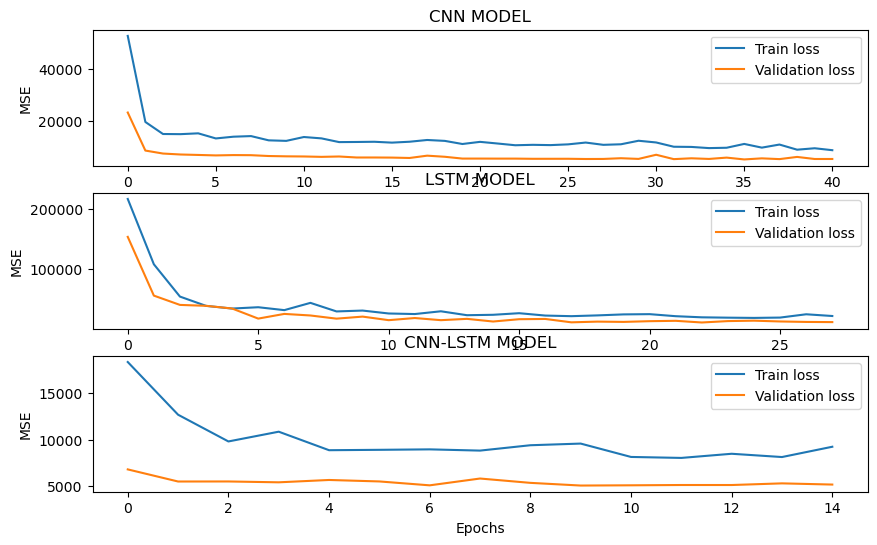

In [136]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(3, 1, sharey=False,figsize=(10,6))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]



ax1.plot(cnn_history.history['loss'], label='Train loss')
ax1.plot(cnn_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('CNN MODEL')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

ax2.plot(lstm_history.history['loss'], label='Train loss')
ax2.plot(lstm_history.history['val_loss'], label='Validation loss')
ax2.legend(loc='best')
ax2.set_title('LSTM MODEL')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

ax3.plot(cnn_lstm_history.history['loss'], label='Train loss')
ax3.plot(cnn_lstm_history.history['val_loss'], label='Validation loss')
ax3.legend(loc='best')
ax3.set_title('CNN-LSTM MODEL')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('MSE')

plt.show()

In [137]:
cnn_train_pred = cnn.predict(X_train_series)
cnn_valid_pred = cnn.predict(X_valid_series)
print('Train CNN rmse:', np.sqrt(mean_squared_error(Y_train, cnn_train_pred)))
print('Validation CNN rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred)))

81/81 [==============================] - 0s 3ms/step
Train CNN rmse: 81.58442398389131
Validation CNN rmse: 71.80778645082074


In [138]:
lstm_train_pred = lstm.predict(X_train_series)
lstm_valid_pred = lstm.predict(X_valid_series)
print('Train LSTM rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation LSTM rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred)))

81/81 [==============================] - 2s 25ms/step
Train LSTM rmse: 120.63186924366595
Validation LSTM rmse: 111.09074862603437


In [139]:
cnn_lstm_train_pred = cnn_lstm.predict(X_train_series_sub)
cnn_lstm_valid_pred = cnn_lstm.predict(X_valid_series_sub)
print('Train CNN-LSTM rmse:', np.sqrt(mean_squared_error(Y_train, cnn_lstm_train_pred)))
print('Validation CNN-LSTM rmse:', np.sqrt(mean_squared_error(Y_valid, cnn_lstm_valid_pred)))

81/81 [==============================] - 0s 4ms/step
Train CNN-LSTM rmse: 86.25529002629709
Validation CNN-LSTM rmse: 71.88599533593897


In [140]:
# # delete

# lagsize=6
# window = 10
# lag = lagsize
# series = series_to_supervised(train_gp.drop('date', axis=1).iloc[:35,:], window=window, lag=lag)
# columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['family', 'store_nbr','onpromotion']]

# for i in range(window, 0, -1):
#     columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['family', 'store_nbr','onpromotion']]
# series.drop(columns_to_drop, axis=1, inplace=True)
# series.drop(['family(t)', 'store_nbr(t)'], axis=1, inplace=True)
# series

In [141]:
# columns_to_drop